# VARHCPC

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
#changement de dossier
import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

#importation des données
import pandas as pd
vote = pd.read_excel("vote_clustering.xlsx")
vote.head()

,affiliation,budget,physician,salvador,nicaraguan,missile,education
0,republican,n,y,y,n,n,y
1,republican,n,y,y,n,n,y
2,democrat,y,neither,y,n,n,n
3,democrat,y,n,neither,n,n,n
4,democrat,y,n,y,n,n,neither


## ACM sur les données actives

In [3]:
# ACM
from scientisttools import MCA

my_mca = MCA(n_components=2,benzecri=False,greenacre=False,quali_sup=0,parallelize=False)
my_mca.fit(vote)

MCA(benzecri=False, greenacre=False, n_components=2, quali_sup=0)

In [5]:
# Coordonnées des modalités
my_mca.var_["coord"]

,Dim.1,Dim.2
budget_n,1.036268,-0.122848
budget_neither,-0.144353,4.493302
budget_y,-0.694127,-0.112329
physician_n,-0.742239,-0.123821
physician_neither,-0.382880,4.489729
physician_y,1.059575,-0.106234
salvador_n,-0.918398,-0.152289
salvador_neither,-0.305731,3.222448
salvador_y,0.922701,-0.078588
nicaraguan_n,1.036804,-0.098726


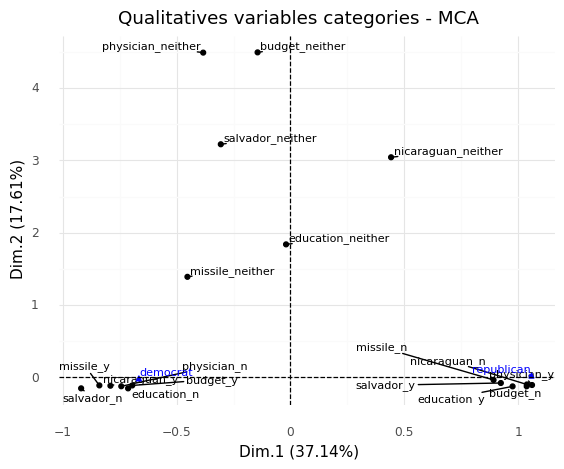

In [14]:
from scientisttools import fviz_mca_mod
p = fviz_mca_mod(my_mca,repel=True)
print(p)

In [7]:
my_mca.var_["infos"]

,dist,weight,inertia
budget_n,1.242521,0.065517,0.101149
budget_neither,6.208499,0.004215,0.162452
budget_y,0.848155,0.096935,0.069732
physician_n,0.872430,0.094636,0.072031
physician_neither,6.208499,0.004215,0.162452
physician_y,1.207322,0.067816,0.098851
salvador_n,1.044675,0.079693,0.086973
salvador_neither,5.291503,0.005747,0.160920
salvador_y,1.025615,0.081226,0.085441
nicaraguan_n,1.201591,0.068199,0.098467


> Note

Dans ce tableau `weight` représente le poids relatif de chaque modalité, c'est - à - dire :

$$
w_{k} = \dfrac{n_{k}}{n\times p}
$$

où 
* $n_{k}$ est le nombre d'individu possédant la modalité $k$
* $n$ le nombre total d'individu
* $p$ le nombre de variables catégorielles

Dans le cadre de la classification automatique, on utilise le poids absolu (ou proportion), c'est - à - dire :

$$
p_{k} = \dfrac{n_{k}}{n} = w_{k}\times p
$$

In [8]:
# Poids absolus des modalités
my_mca.var_["infos"].loc[:,"weight"]*my_mca.var_["eta2"].shape[0]

budget_n              0.393103
budget_neither        0.025287
budget_y              0.581609
physician_n           0.567816
physician_neither     0.025287
physician_y           0.406897
salvador_n            0.478161
salvador_neither      0.034483
salvador_y            0.487356
nicaraguan_n          0.409195
nicaraguan_neither    0.034483
nicaraguan_y          0.556322
missile_n             0.473563
missile_neither       0.050575
missile_y             0.475862
education_n           0.535632
education_neither     0.071264
education_y           0.393103
Name: weight, dtype: float64

## Classification automatique

In [9]:
from scientisttools import VARHCPC

In [10]:
# 
varhcpc = VARHCPC(my_mca,n_clusters=4,metric="euclidean",method="average",parallelize=False)

In [11]:
varhcpc.cluster_["coord"]

,Dim.1,Dim.2
clust,,
1,0.982066,-0.092309
2,-0.072444,3.707536
3,-0.777473,-0.127651
4,-0.199041,1.652219


### Dendrogram

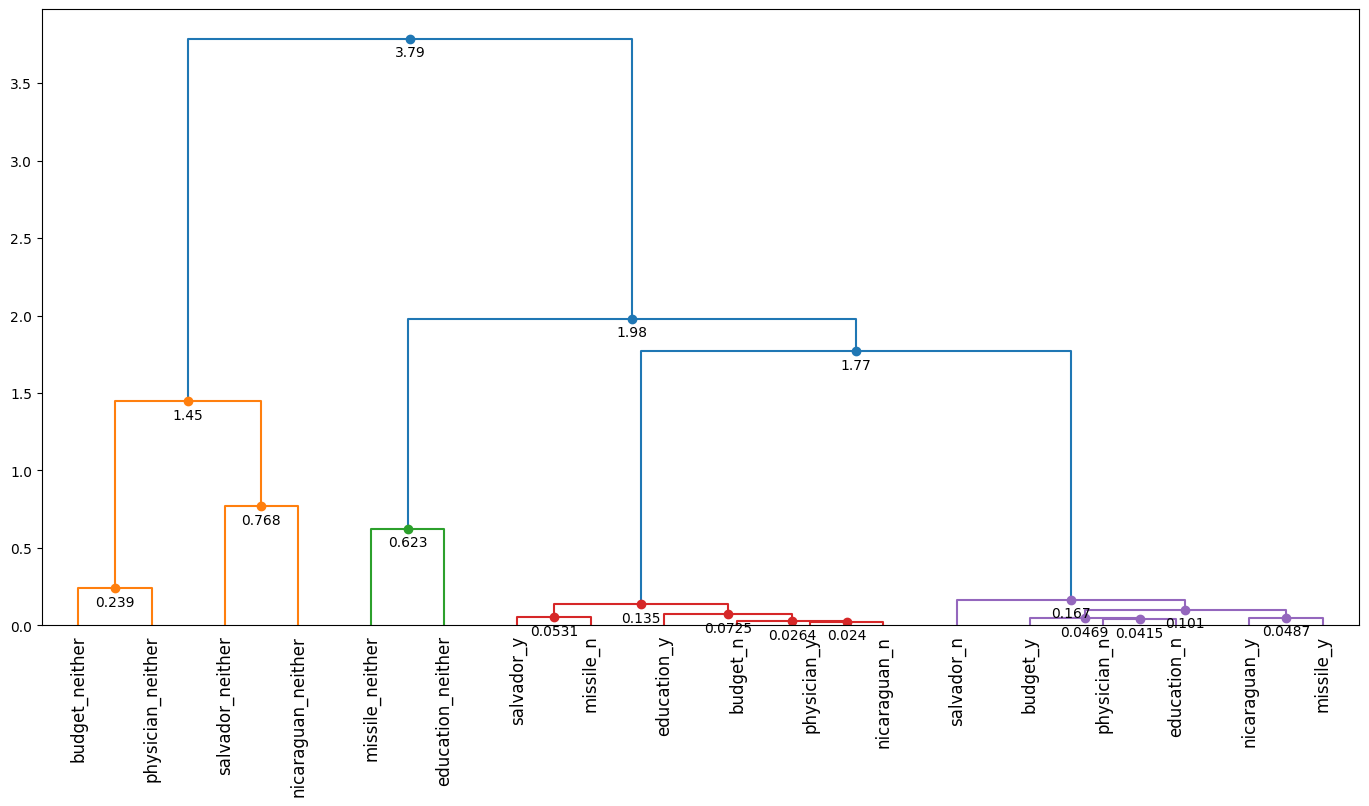

In [12]:
# Dendrogram
import matplotlib.pyplot as plt
from scientisttools import plot_dendrogram
fig, axe = plt.subplots(figsize=(17,8))
plot_dendrogram(varhcpc,ax=axe,orientation='top',leaf_rotation=90,color_threshold=1.6)
plt.show()

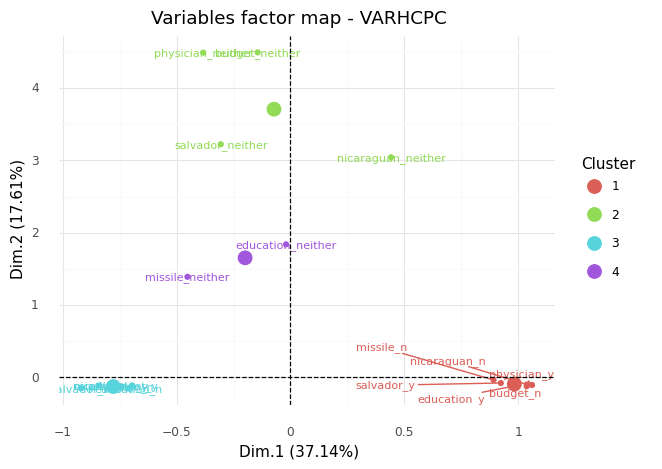

In [13]:
from scientisttools import fviz_varhcpc_cluster
p = fviz_varhcpc_cluster(varhcpc,repel=True,show_clust_cent=True)
print(p)